#Object Recognition using the CIFAR 100 Dataset

Importing packages required, loading the data and printing the shapes of all the data variables

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
import tensorflow as tf
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from google.colab import drive
drive.mount('/content/drive')
BASE_PATH = '/content/drive/MyDrive'

trn_images = np.load(BASE_PATH+'/trnImage.npy')
trn_label_fine = np.load(BASE_PATH+'/trnLabel_fine.npy')
trn_label_coarse = np.load(BASE_PATH+'/trnLabel_coarse.npy')
tst_images = np.load(BASE_PATH+'/tstImage.npy')
tst_label_fine = np.load(BASE_PATH+'/tstLabel_fine.npy')
tst_label_coarse = np.load(BASE_PATH+'/tstLabel_coarse.npy')

print(f'Images Shape: {trn_images.shape}')
print(f'Images Fine Labels Shape: {trn_label_fine.shape}')
print(f'Images Coarse Labels Shape: {trn_label_coarse.shape}')
print(f'Test Images Shape: {tst_images.shape}')
print(f'Test Images Fine Labels Shape: {tst_label_fine.shape}')
print(f'Test Images Coarse Labels Shape: {tst_label_coarse.shape}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Images Shape: (32, 32, 3, 50000)
Images Fine Labels Shape: (50000,)
Images Coarse Labels Shape: (50000,)
Test Images Shape: (32, 32, 3, 10000)
Test Images Fine Labels Shape: (10000,)
Test Images Coarse Labels Shape: (10000,)


Transposing training images

In [ ]:
# Lets call transpose on our 4D tensor
transposed = np.transpose(trn_images, [3,0,1,2])
print(f'Shape of transposed: {transposed.shape}')


Shape of transposed: (50000, 32, 32, 3)


#CNN testing

Model creation

In [ ]:
model = tf.keras.Sequential(layers=[
  tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'),
  tf.keras.layers.Conv2D(32, kernel_size=3, activation='relu'),
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(100, activation=tf.nn.softmax)])

    

Model compilation and model fitted with the training data and fine labels

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=tf.keras.metrics.SparseCategoricalAccuracy())

fit1 = model.fit(transposed, trn_label_fine, batch_size = 128, epochs=20, validation_split = 0.2)

Epoch 1/20
313/313 [==============================] - 16s 46ms/step - loss: 4.5400 - sparse_categorical_accuracy: 0.0262 - val_loss: 4.3369 - val_sparse_categorical_accuracy: 0.0424
Epoch 2/20
313/313 [==============================] - 14s 43ms/step - loss: 4.0993 - sparse_categorical_accuracy: 0.0778 - val_loss: 4.0089 - val_sparse_categorical_accuracy: 0.0866
Epoch 3/20
313/313 [==============================] - 14s 44ms/step - loss: 3.8420 - sparse_categorical_accuracy: 0.1233 - val_loss: 3.8431 - val_sparse_categorical_accuracy: 0.1190
Epoch 4/20
313/313 [==============================] - 14s 45ms/step - loss: 3.6884 - sparse_categorical_accuracy: 0.1502 - val_loss: 3.7790 - val_sparse_categorical_accuracy: 0.1309
Epoch 5/20
313/313 [==============================] - 14s 44ms/step - loss: 3.5752 - sparse_categorical_accuracy: 0.1679 - val_loss: 3.6343 - val_sparse_categorical_accuracy: 0.1610
Epoch 6/20
313/313 [==============================] - 14s 44ms/step - loss: 3.4677 - spars

Model accuracy and losses plotted, with the evaluation and predictions created too

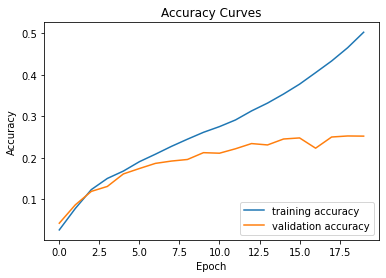

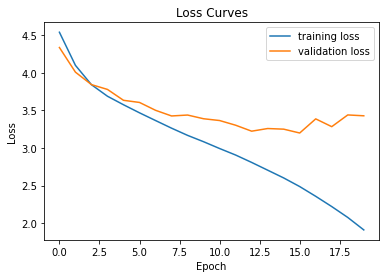

Shape of transposed: (10000, 32, 32, 3)
313/313 [==============================] - 3s 9ms/step - loss: 3.3883 - sparse_categorical_accuracy: 0.2571
evaluation:  [3.388277292251587, 0.257099986076355]
prediction:  [[1.8765793e-04 3.5899524e-05 1.8682066e-02 ... 5.7392375e-04
  1.2679409e-03 1.4219432e-04]
 [9.2606893e-04 2.2666943e-03 2.5486778e-02 ... 1.6231360e-02
  4.5902308e-04 6.2526106e-03]
 [7.3657652e-06 5.1096668e-03 3.8064236e-03 ... 1.2386834e-03
  4.7010070e-04 2.2733755e-06]
 ...
 [9.3095332e-05 4.0888730e-03 5.5196853e-07 ... 8.4879622e-04
  2.3063627e-07 4.3707038e-03]
 [4.8191636e-05 1.5648069e-05 3.4929864e-02 ... 6.3480781e-03
  3.2719083e-02 1.1019304e-02]
 [9.9442728e-02 1.0946558e-02 3.9876811e-02 ... 1.6818592e-07
  3.5709874e-03 3.1543375e-05]]


In [ ]:
plt.plot(fit1.history['sparse_categorical_accuracy'], label='training accuracy')
plt.plot(fit1.history['val_sparse_categorical_accuracy'], label='validation accuracy')
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()


plt.plot(fit1.history['loss'], label='training loss')
plt.plot(fit1.history['val_loss'], label='validation loss')
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

transposed_tst = np.transpose(tst_images, [3,0,1,2])
print(f'Shape of transposed: {transposed_tst.shape}')

evaluate_1 = model.evaluate(transposed_tst, tst_label_fine)
print("evaluation: ", evaluate_1)
predict_1 = model.predict(transposed_tst)
print("prediction: ", predict_1)

Preparation of data for confusion matrix

In [ ]:
predict_fine=np.argmax(predict_1,axis=1)
print(classification_report(y_true=predict_fine, y_pred=tst_label_fine))



              precision    recall  f1-score   support

           0       0.58      0.46      0.52       125
           1       0.31      0.37      0.34        83
           2       0.44      0.11      0.18       402
           3       0.30      0.12      0.17       256
           4       0.19      0.16      0.17       119
           5       0.09      0.26      0.13        34
           6       0.21      0.29      0.24        72
           7       0.39      0.27      0.32       145
           8       0.28      0.22      0.25       128
           9       0.32      0.45      0.37        71
          10       0.02      0.22      0.04         9
          11       0.14      0.19      0.16        72
          12       0.30      0.22      0.25       139
          13       0.23      0.24      0.24        95
          14       0.14      0.36      0.20        39
          15       0.06      0.13      0.08        46
          16       0.22      0.30      0.25        73
          17       0.26    

Creation and plotting of confusion matrix

[[58  1  1 ...  0  1  1]
 [ 1 31  0 ...  0  0  0]
 [ 4  2 44 ...  6 18  2]
 ...
 [ 0  1  0 ... 28  1  0]
 [ 0  0  1 ...  0  5  0]
 [ 0  0  1 ...  1  2 23]]


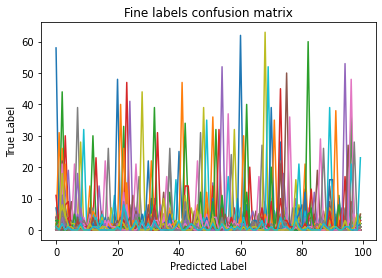

In [ ]:
print(confusion_matrix(y_true=predict_fine, y_pred=tst_label_fine))
cfm_fine = confusion_matrix(y_true=predict_fine, y_pred=tst_label_fine)
plt.figure()
plt.plot(cfm_fine)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Fine labels confusion matrix')
plt.show()

Model fitted with the training data and coarse labels

In [ ]:
fit2 = model.fit(transposed, trn_label_coarse, batch_size = 128, epochs=20, validation_split = 0.2)

Epoch 1/20
313/313 [==============================] - 14s 44ms/step - loss: 2.4659 - sparse_categorical_accuracy: 0.2781 - val_loss: 2.2504 - val_sparse_categorical_accuracy: 0.3178
Epoch 2/20
313/313 [==============================] - 14s 44ms/step - loss: 2.0322 - sparse_categorical_accuracy: 0.3779 - val_loss: 2.1208 - val_sparse_categorical_accuracy: 0.3595
Epoch 3/20
313/313 [==============================] - 14s 44ms/step - loss: 1.8698 - sparse_categorical_accuracy: 0.4264 - val_loss: 2.0715 - val_sparse_categorical_accuracy: 0.3794
Epoch 4/20
313/313 [==============================] - 14s 44ms/step - loss: 1.7305 - sparse_categorical_accuracy: 0.4678 - val_loss: 2.0426 - val_sparse_categorical_accuracy: 0.3880
Epoch 5/20
313/313 [==============================] - 14s 44ms/step - loss: 1.6033 - sparse_categorical_accuracy: 0.5074 - val_loss: 2.0693 - val_sparse_categorical_accuracy: 0.3822
Epoch 6/20
313/313 [==============================] - 14s 45ms/step - loss: 1.4759 - spars

Model accuracy and losses plotted, with the evaluation and predictions created too

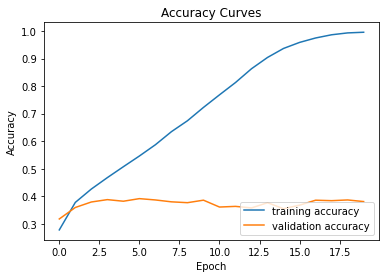

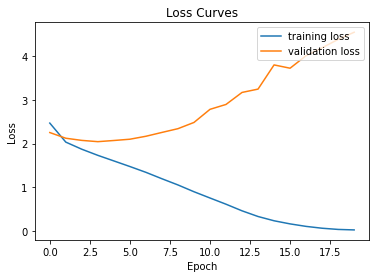

313/313 [==============================] - 3s 8ms/step - loss: 4.5466 - sparse_categorical_accuracy: 0.3798
evaluation:  [4.546628952026367, 0.3797999918460846]
prediction:  [[1.0220938e-01 9.3343886e-07 7.1167365e-06 ... 3.7883560e-10
  1.7289431e-10 6.6825716e-12]
 [7.5187912e-05 3.1778820e-02 6.5356375e-08 ... 7.3323795e-12
  2.9696206e-12 6.5883469e-14]
 [8.3495814e-01 5.9120296e-08 3.0954070e-02 ... 2.9605240e-10
  5.0406440e-10 1.8416529e-10]
 ...
 [5.4067726e-08 4.3449261e-05 8.5037360e-10 ... 1.8155764e-19
  1.0778894e-22 9.9800209e-18]
 [1.3092393e-02 8.2607676e-10 2.5914665e-07 ... 2.7141477e-11
  1.2952630e-09 5.4899028e-09]
 [1.1766257e-10 2.6347165e-04 1.9939209e-03 ... 3.4437836e-20
  3.9949340e-13 8.8795430e-17]]
classes:  [ 9  8  0 ... 17 12  5]


In [ ]:
plt.plot(fit2.history['sparse_categorical_accuracy'], label='training accuracy')
plt.plot(fit2.history['val_sparse_categorical_accuracy'], label='validation accuracy')
plt.title('Accuracy Curves')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()


plt.plot(fit2.history['loss'], label='training loss')
plt.plot(fit2.history['val_loss'], label='validation loss')
plt.title('Loss Curves')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()


evaluate_2 = model.evaluate(transposed_tst, tst_label_coarse)
print("evaluation: ", evaluate_2)
predict_2 = model.predict(transposed_tst)
print("prediction: ", predict_2)
classes_2 = np.argmax(predict_2, axis=1)
print("classes: ", classes_2)

Preparation of data for confusion matrix

In [ ]:
predict_coarse=np.argmax(predict_1,axis=1)
print(classification_report(y_true=predict_coarse, y_pred=tst_label_coarse))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       125
           1       0.07      0.45      0.13        83
           2       0.01      0.01      0.01       402
           3       0.01      0.03      0.02       256
           4       0.00      0.01      0.00       119
           5       0.00      0.00      0.00        34
           6       0.00      0.01      0.00        72
           7       0.12      0.43      0.19       145
           8       0.01      0.05      0.02       128
           9       0.01      0.04      0.01        71
          10       0.00      0.00      0.00         9
          11       0.00      0.03      0.01        72
          12       0.00      0.01      0.00       139
          13       0.01      0.03      0.01        95
          14       0.00      0.03      0.00        39
          15       0.00      0.04      0.01        46
          16       0.01      0.05      0.01        73
          17       0.01    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Creation and plotting of confusion matrix

[[ 0  2 12 ...  0  0  0]
 [ 0 37 12 ...  0  0  0]
 [ 7 11  6 ...  0  0  0]
 ...
 [ 3  5  1 ...  0  0  0]
 [ 0  0  2 ...  0  0  0]
 [ 5  6  4 ...  0  0  0]]


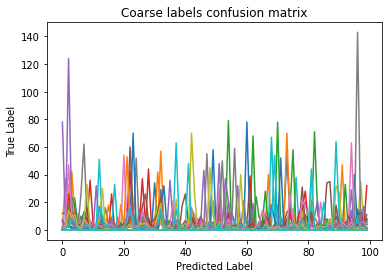

In [ ]:
print(confusion_matrix(y_true=predict_coarse, y_pred=tst_label_coarse))
cfm_coarse = confusion_matrix(y_true=predict_coarse, y_pred=tst_label_coarse)
plt.figure()
plt.plot(cfm_coarse)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Coarse labels confusion matrix')
plt.show()

#SVC testing:

Reshaping the data for the SVC model

In [ ]:
train_data = trn_images.reshape(50000, 3*32*32)
test_data = tst_images.reshape(10000, 3*32*32)
train_fine = trn_label_fine.flatten()
test_fine = tst_label_fine.flatten()
train_coarse = trn_label_coarse.flatten()
test_coarse = tst_label_coarse.flatten()


Fitting the reshaped data to the standard scaler

In [ ]:
scaler_model = StandardScaler().fit(train_data)
train_transform = scaler_model.transform(train_data)
test_transform = scaler_model.transform(test_data)

Training the model on the Fine Labels

In [ ]:
SVC_model = SVC().fit(train_transform, train_fine)
SVM_score = SVC_model.score(test_transform, test_fine)
SVC_pred = SVC_model.predict(test_transform)
print("predictions: ")
print(SVC_pred)
print("score: ")
print(SVM_score)

Confusion Matrix for fine labels

In [ ]:
ConfusionMatrixDisplay.from_estimator(SVC_model, test_data, test_fine)

Training the model on the Coarse Labels

In [ ]:
SVC_model = SVC().fit(train_transform, train_coarse)
SVM_score = SVC_model.score(test_transform, test_coarse)
SVC_pred = SVC_model.predict(test_transform)
print("predictions: ")
print(SVC_pred)
print("score: ")
print(SVM_score)

Confusion Matrix for coarse labels

In [ ]:
ConfusionMatrixDisplay.from_estimator(SVC_model, test_data, test_coarse)